In [1]:
import os
os.chdir("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Anomaly.estimators import meanEmbeding_MC, moyenneMMD_MC, partial_varianceOMMD_MC, var_OMMD_MC, threshold_MC, puissance_MC
from Anomaly.kernels import Gaussian, Laplacian, Polynomial, CCK
from Anomaly.utils import normal, inv_phi
from Anomaly.experiments import courbe_ROC
from Anomaly.MMD import OMMD
from scipy import stats

# Gaussian Kernel // Normal Law

## mean embeding

In [3]:
sigma = 2
mu = -2
omega = 5
law_p = normal(mu,sigma)
kernel = Gaussian(omega)

In [4]:
x = np.r_[[0.1*i - 10 for i in range(200)]]
# Theorie
f = lambda x : np.sqrt(omega**2/(omega**2+sigma**2))*np.exp(-(x-mu)**2/(2*(sigma**2+omega**2)))
yth = f(x)
# Experimental values
yex = [meanEmbeding_MC(kernel, x[i], law_p) for i in range(200)]

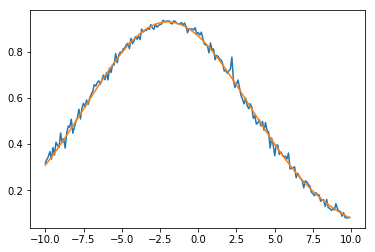

In [5]:
plt.plot(x,yex)
plt.plot(x,yth)

In [6]:
15*12*3

540

## MMD

In [9]:
sigma1 = 3
mu1 = 0
sigma2 = 2
mu2 = 1
omega = 0.1
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
kernel = Gaussian

In [10]:
moyenneMMD_MC(OMMD,kernel(omega**2),law_p,law_q,1000,1000)

0.0010294156339410861

In [11]:
def MMD_th(omega, mu1, sigma1, mu2, sigma2):
    return (np.sqrt(omega**2/(2*sigma1**2+omega**2))
                   + np.sqrt(omega**2/(2*sigma2**2+omega**2))
                   -2*np.sqrt(omega**2/(sigma1**2+sigma2**2+omega**2))*np.exp(-(mu1-mu2)**2/(2*(sigma1**2+sigma2**2+omega**2))))

In [12]:
x = np.r_[[0.05*i for i in range(200)]]
# Theorie
f = lambda x : MMD_th(x, mu1, sigma1, mu2, sigma2)
yth = f(x)
# Experimental values
yex = [moyenneMMD_MC(OMMD,kernel(x[i]**2),law_p,law_q,100,100) for i in range(200)]

/home/kronert/Documents/Python/Mémoire/Memoire/Anomaly/kernels.py:126: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-np.linalg.norm(X-Y,axis=1)**2/(2*self.parameters["omega"]**2))


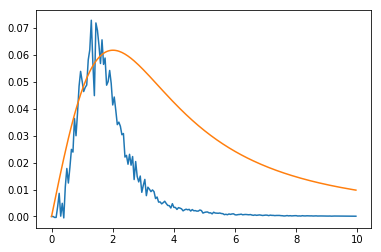

In [13]:
plt.plot(x,yex)
plt.plot(x,yth)

## f(X,X') Expectation

In [14]:
def fexpacationOMMD_MC(kernel,  law_p, law_q, size_gen = 100, finalSampleSize=1000, verbose = 1):
    sample = np.zeros(finalSampleSize)
    for i in range(finalSampleSize):
        if verbose > 0:
            print(i/finalSampleSize*100, '% achevé',end='\r',flush=True)
        x1 = law_p(1)
        x2 = law_p(1)
        sample[i] = kernel(x1,x2) -  meanEmbeding_MC(kernel, x1, law_q, size_gen = size_gen) -  meanEmbeding_MC(kernel, x2, law_q, size_gen = size_gen)
    return sample.mean()

In [15]:
sigma1 = 3
mu1 = 0
sigma2 = 4
mu2 = 10
omega = 0.1
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
kernel = Gaussian

In [16]:
def expfth(omega, mu1, sigma1, mu2, sigma2):
    return (np.sqrt(omega**2/(2*sigma1**2+omega**2)) 
            - 2*np.sqrt(omega**2/(sigma1**2+sigma2**2+omega**2))*np.exp(-(mu1-mu2)**2/(2*(sigma1**2+sigma2**2+omega**2))))

In [17]:
x = np.r_[[0.05*i for i in range(200)]]
# Theorie
f = lambda x : expfth(x, mu1, sigma1, mu2, sigma2)
yth = f(x)
# Experimental values
yex = [fexpacationOMMD_MC(kernel(x[i]**2),law_p,law_q) for i in range(200)]

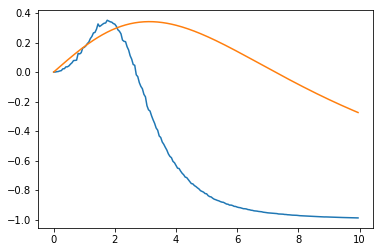

In [18]:
plt.plot(x,yex)
plt.plot(x,yth)

## f(X,X') second order

In [19]:
sigma1 = 3
mu1 = -2
sigma2 = 1
mu2 = 10
omega = 0.1
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
kernel = Gaussian

In [20]:
def fsecondorderOMMD_MC(kernel,  law_p, law_q, size_gen = 100, finalSampleSize=1000, verbose = 1):
    sample = np.zeros(finalSampleSize)
    for i in range(finalSampleSize):
        if verbose > 0:
            print(i/finalSampleSize*100, '% achevé',end='\r',flush=True)
        x1 = law_p(1)
        x2 = law_p(1)
        sample[i] = kernel(x1,x2) -  meanEmbeding_MC(kernel, x1, law_q, size_gen = size_gen) -  meanEmbeding_MC(kernel, x2, law_q, size_gen = size_gen)
    return (sample**2).mean()

In [21]:
def sndOdfth(omega, mu1, sigma1, mu2, sigma2):
    return (
    np.sqrt(omega**2/(4*sigma1**2 + omega**2))
        
        + 2*omega**2/(np.sqrt(omega**2+sigma2**2)*np.sqrt(omega**2+sigma2**2+2*sigma1**2))*np.exp(-(mu1-mu2)**2/(omega**2+sigma2**2+2*sigma1**2))
       
        + 2*omega**2/(omega**2+sigma2**2+sigma1**2)*np.exp(-(mu1-mu2)**2/(omega**2+sigma2**2+sigma1**2))
       
        -4*np.sqrt(omega**4/(sigma1**4+3*sigma1**2*omega**2+2*sigma1**2*sigma2**2+omega**4+sigma2**2*omega**2))
        *np.exp(-(mu1-mu2)**2/(2*((sigma1**4+3*sigma1**2*omega**2+2*sigma1**2*sigma2**2+omega**4+sigma2**2*omega**2)/(2*sigma1**2+omega**2))))
    )

In [22]:
x = np.r_[[0.05*i for i in range(200)]]
# Theorie
f = lambda x : sndOdfth(x, mu1, sigma1, mu2, sigma2)
yth = f(x)
# Experimental values
yex = [fsecondorderOMMD_MC(kernel(x[i]**2),law_p,law_q,verbose=0) for i in range(200)]

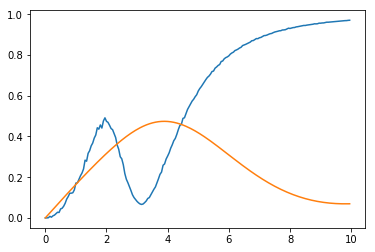

In [23]:
plt.plot(x,yex)
plt.plot(x,yth)

## partial variance

In [24]:
sigma1 = 3
mu1 = -2
sigma2 = 1
mu2 = 10
omega = 0.1
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
kernel = Gaussian

In [25]:
def partialVarianceTh(omega, mu1, sigma1, mu2, sigma2):
    return (
    sndOdfth(omega, mu1, sigma1, mu2, sigma2) - expfth(omega, mu1, sigma1, mu2, sigma2)**2
    )

In [26]:
x = np.r_[[0.05*i for i in range(200)]]
# Theorie
f = lambda x : partialVarianceTh(x, mu1, sigma1, mu2, sigma2)
yth = f(x)
# Experimental values
yex = [partial_varianceOMMD_MC(kernel(x[i]),law_p,law_q,verbose=0) for i in range(200)]

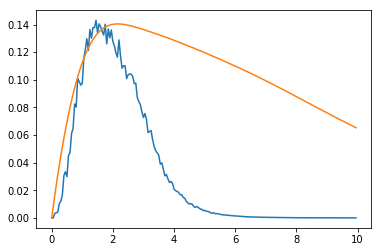

In [27]:
plt.plot(x,yex)
plt.plot(x,yth)

## Variance

In [32]:
sigma1 = 3
mu1 = -2
sigma2 = 1
mu2 = 10
omega = 0.1
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
kernel = Gaussian

In [33]:
def VarianceTh(omega, mu1, sigma1, mu2, sigma2, m, n):
    return (
    2*(partialVarianceTh(omega, mu1, sigma1, mu2, sigma2) + m/n*partialVarianceTh(omega, mu2, sigma2, mu1, sigma1))
    )

In [34]:
x = np.r_[[0.05*i for i in range(200)]]
# Theorie
f = lambda x : VarianceTh(x, mu1, sigma1, mu1, sigma1, 1000,100)
yth = f(x)
# Experimental values
yex = [var_OMMD_MC(kernel(x[i]),law_p,law_p,Lambda=100/1000,verbose=0) for i in range(200)]

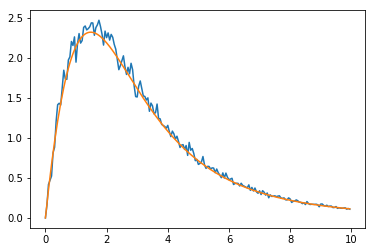

In [35]:
plt.plot(x,yex)
plt.plot(x,yth)

## Threshold

In [10]:
sigma1 = 10
mu1 = 0
law_p = normal(mu1,sigma1)
kernel = gaussian
alpha = 0.05
m=1000
n=100

In [42]:
def ThresholdTh(omega, mu1, sigma1, m, n,alpha):
    return (
        np.sqrt(VarianceTh(omega, mu1, sigma1, mu1, sigma1, m, n))*inv_phi(1-alpha)/np.sqrt(m)
    )

In [12]:
x = np.r_[[0.05*i for i in range(200)]]
# Theorie
f = lambda x : ThresholdTh(x,  mu1, sigma1, m, n,alpha)
yth = f(x)
# Experimental values
yex = [threshold_MC(kernel(x[i]**2),law_p,law_p,m,n, alpha=alpha,verbose=0) for i in range(200)]

/home/kronert/Documents/Python/Mémoire/Memoire/Anomaly/kernels.py:14: RuntimeWarning: divide by zero encountered in true_divide
  gaussian = lambda sigma: lambda x,y : np.exp(-np.linalg.norm(x-y,axis=1)**2/(2*sigma))


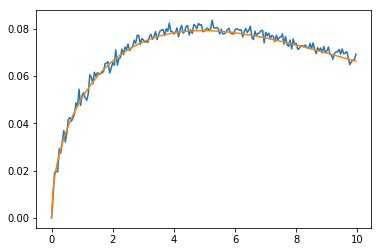

In [13]:
plt.plot(x,yex)
plt.plot(x,yth)

## Power

In [43]:
sigma1 = 1.21
mu1 = 0.2
sigma2 = 1
mu2 = 0
omega = 0.1
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
kernel = Gaussian
alpha = 0.05
m=1000
n=100

In [44]:
from scipy import stats

In [45]:
def PowerTh(omega, mu1, sigma1, mu2, sigma2, m, n,alpha):
    return stats.norm.sf((np.sqrt(m)*(ThresholdTh(omega, mu1, sigma1, m, n,alpha)
                           - MMD_th(omega, mu1, sigma1, mu2, sigma2)))
                          /np.sqrt(VarianceTh(omega, mu1, sigma1, mu2, sigma2, m, n)))

In [46]:
x = np.r_[[0.5*i for i in range(20)]]
# Theorie
f = lambda x : PowerTh(x, mu1, sigma1, mu2, sigma2, m, n,alpha)
yth = f(x)
# Experimental values
yex = [puissance_MC(OMMD, kernel(x[i]),law_p,law_q,m,n, threshold_MC(kernel(x[i]**2),law_p,law_p,m,n, alpha=alpha,verbose=0),repeat=1000) for i in range(20)]

/home/kronert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/kronert/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/kronert/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/kronert/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


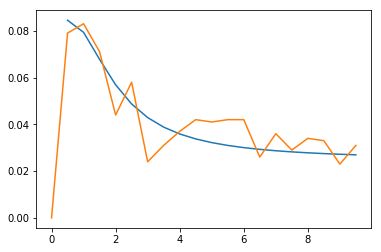

In [40]:
plt.plot(x,yth)
plt.plot(x,yex)

In [32]:
yex

[0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [26]:
PowerTh(8, mu1, sigma1, mu2, sigma2, m, n,alpha)

0.9920730835120034

In [27]:
puissance_MC(OMMD, kernel(8**2),law_p,law_q,m,n, threshold_MC(kernel(8**2),law_p,law_p,m,n, alpha=alpha,verbose=0),repeat=1000)

0.988

/home/kronert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/kronert/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/kronert/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/kronert/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


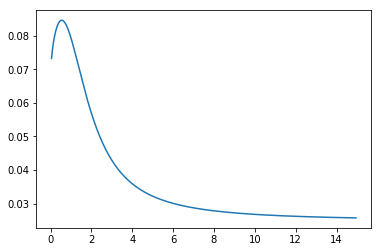

In [35]:
sigma1 = 1.21
mu1 = 0.2
sigma2 = 1
mu2 = 0
omega = 0.1
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
kernel = gaussian
alpha = 0.05
m=1000
n=100
x = np.r_[[0.05*i for i in range(300)]]
# Theorie
f = lambda x : PowerTh(x, mu1, sigma1, mu2, sigma2, m, n,alpha)
yth2 = f(x)
plt.plot(x,yth2)

# Sum of gaussian kernels|| Normal Distribution

## Second order moment (product)

In [16]:
def ExpProd_MC(kernel1, kernel2, law_p, law_q, size_gen = 100, finalSampleSize=1000, verbose = 1):
    sample = np.zeros( finalSampleSize)
    for i in range(finalSampleSize):
        if verbose > 0:
            print(i/finalSampleSize*100, '% achevé',end='\r',flush=True)
        x1 = law_p(1)
        x2 = law_p(1)
        
        sample[i] = ((kernel1(x1,x2) -  meanEmbeding_MC(kernel1, x1, law_q, size_gen = size_gen) -  meanEmbeding_MC(kernel1, x2, law_q, size_gen = size_gen))*
                       (kernel2(x1,x2) -  meanEmbeding_MC(kernel2, x1, law_q, size_gen = size_gen) -  meanEmbeding_MC(kernel2, x2, law_q, size_gen = size_gen)))
        
    return np.mean(sample)

In [17]:
def ExpProd1(omega1, omega2, mu1, sigma1, mu2, sigma2):
    omega = np.sqrt(2*(omega1**2*omega2**2)/(omega1**2 + omega2**2))
    omegaSigma = np.sqrt((2*(omega1**2+sigma2)*(omega2**2+sigma2))/((omega1**2+sigma2) + (omega2**2+sigma2)))
    
    return (
    np.sqrt(omega**2/(4*sigma1**2 + omega**2)))
def ExpProd2(omega1, omega2, mu1, sigma1, mu2, sigma2):
    omega = np.sqrt(2*(omega1**2*omega2**2)/(omega1**2 + omega2**2))
    omegaSigma = np.sqrt((2*(omega1**2+sigma2)*(omega2**2+sigma2))/((omega1**2+sigma2) + (omega2**2+sigma2)))
    return (        
        2*(np.sqrt(omega1**2/(omega1**2+sigma2**2))*np.sqrt(omega2**2/(omega2**2+sigma2**2))
           *np.sqrt(omegaSigma**2/(omegaSigma**2+2*sigma1**2)))*np.exp(-(mu1-mu2)**2/(2*(omegaSigma**2+2*sigma1**2)))
    )
def ExpProd3(omega1, omega2, mu1, sigma1, mu2, sigma2):
    omega = np.sqrt(2*(omega1**2*omega2**2)/(omega1**2 + omega2**2))
    omegaSigma = np.sqrt((2*(omega1**2+sigma2)*(omega2**2+sigma2))/((omega1**2+sigma2) + (omega2**2+sigma2)))
    return (        
        -2*np.sqrt(omega1**2*omega2**2/(sigma1**4+sigma1**2*omega1**2+2*sigma1**2*omega2**2+2*sigma1**2*sigma2**2+omega1**2*omega2**2+sigma2**2*omega1**2))
        *np.exp(-(mu1-mu2)**2/(2*((sigma1**4+sigma1**2*omega1**2+2*sigma1**2*omega2**2+2*sigma1**2*sigma2**2+omega1**2*omega2**2+sigma2**2*omega1**2)/(2*sigma1**2+omega1**2))))
    )
def ExpProd4(omega1, omega2, mu1, sigma1, mu2, sigma2):
    omega = np.sqrt(2*(omega1**2*omega2**2)/(omega1**2 + omega2**2))
    omegaSigma = np.sqrt((2*(omega1**2+sigma2)*(omega2**2+sigma2))/((omega1**2+sigma2) + (omega2**2+sigma2)))
    
    return (
        -2*np.sqrt(omega2**2*omega1**2/(sigma1**4+sigma1**2*omega2**2+2*sigma1**2*omega1**2+2*sigma1**2*sigma2**2+omega2**2*omega1**2+sigma2**2*omega2**2))
        *np.exp(-(mu1-mu2)**2/(2*((sigma1**4+sigma1**2*omega2**2+2*sigma1**2*omega1**2+2*sigma1**2*sigma2**2+omega2**2*omega1**2+sigma2**2*omega2**2)/(2*sigma1**2+omega2**2))))
    )


In [18]:
def ExpProd(omega1, omega2, mu1, sigma1, mu2, sigma2):
    omega = np.sqrt((omega1**2*omega2**2)/(omega1**2 + omega2**2))
    omegaSigma = np.sqrt(((omega1**2+sigma2**2)*(omega2**2+sigma2**2))/((omega1**2+sigma2**2) + (omega2**2+sigma2**2)))
    
    return (
    np.sqrt(omega**2/(2*sigma1**2 + omega**2))
        
        + 2*(np.sqrt(omega1**2/(omega1**2+sigma2**2))*np.sqrt(omega2**2/(omega2**2+sigma2**2))
           *np.sqrt(omegaSigma**2/(omegaSigma**2+sigma1**2)))*np.exp(-(mu1-mu2)**2/(2*(omegaSigma**2+sigma1**2)))

        + 2*np.sqrt(omega1**2/(omega1**2+sigma2**2+sigma1**2))*np.exp(-(mu1-mu2)**2/(2*(omega1**2+sigma2**2+sigma1**2)))
        *np.sqrt(omega2**2/(omega2**2+sigma2**2+sigma1**2))*np.exp(-(mu1-mu2)**2/(2*(omega2**2+sigma2**2+sigma1**2)))

        -2*np.sqrt(omega1**2*omega2**2/(sigma1**4+sigma1**2*omega1**2+2*sigma1**2*omega2**2+2*sigma1**2*sigma2**2+omega1**2*omega2**2+sigma2**2*omega1**2))
        *np.exp(-(mu1-mu2)**2/(2*((sigma1**4+sigma1**2*omega1**2+2*sigma1**2*omega2**2+2*sigma1**2*sigma2**2+omega1**2*omega2**2+sigma2**2*omega1**2)/(2*sigma1**2+omega1**2))))
       
        -2*np.sqrt(omega2**2*omega1**2/(sigma1**4+sigma1**2*omega2**2+2*sigma1**2*omega1**2+2*sigma1**2*sigma2**2+omega2**2*omega1**2+sigma2**2*omega2**2))
        *np.exp(-(mu1-mu2)**2/(2*((sigma1**4+sigma1**2*omega2**2+2*sigma1**2*omega1**2+2*sigma1**2*sigma2**2+omega2**2*omega1**2+sigma2**2*omega2**2)/(2*sigma1**2+omega2**2))))
    )


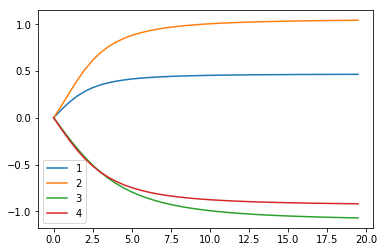

In [274]:
x = np.r_[[0.5*i for i in range(40)]]
# Theorie
f = lambda x : ExpProd1(x,omega2, mu1, sigma1, mu2, sigma2)
yth = f(x)
plt.plot(x,yth,label="1")
f = lambda x : ExpProd2(x,omega2, mu1, sigma1, mu2, sigma2)
yth = f(x)
plt.plot(x,yth,label="2")
f = lambda x : ExpProd3(x,omega2, mu1, sigma1, mu2, sigma2)
yth = f(x)
plt.plot(x,yth,label="3")
f = lambda x : ExpProd4(x,omega2, mu1, sigma1, mu2, sigma2)
yth = f(x)
plt.plot(x,yth,label="4")
plt.legend()

In [275]:
sigma1 = 4
mu1 = 0.25
sigma2 = 2
mu2 = 1
omega1 = 5
omega2 = 3
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
kernel1 = gaussian(omega1**2)
kernel2 = gaussian(omega2**2)
m=1000
n=100


In [276]:
sndOdfth(omega1, mu1, sigma1, mu2, sigma2)

0.7385106574357607

In [279]:
ExpProd(omega1,omega2, mu1, sigma1, mu2, sigma2)

0.6065295918696755

In [280]:
ExpProd_MC(kernel1, kernel2, law_p, law_q, size_gen = 1000, finalSampleSize=1000, verbose = 0)

0.6085900069688325

In [284]:
x = np.r_[[0.5*i for i in range(40)]]
# Theorie
f = lambda x : ExpProd(x,omega2, mu1, sigma1, mu2, sigma2)
yth = f(x)
# Experimental values
yex = [ExpProd_MC(gaussian(x[i]**2), kernel2, law_p, law_q, size_gen = 1000, finalSampleSize=1000, verbose = 0) for i in range(40)]

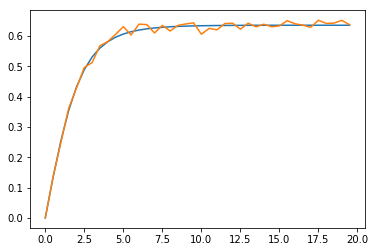

In [285]:
plt.plot(x,yth)
plt.plot(x,yex)

## Covariance

In [19]:
def partial_covarianceTh(omega1, omega2, mu1, sigma1, mu2, sigma2):
    return ExpProd(omega1, omega2, mu1, sigma1, mu2, sigma2) - expfth(omega1, mu1, sigma1, mu2, sigma2)*expfth(omega2, mu1, sigma1, mu2, sigma2)

In [287]:
ExpProd(omega1, omega2, mu1, sigma1, mu2, sigma2)

0.6065295918696755

In [288]:
expfth(omega1, mu1, sigma1, mu2, sigma2)

-0.8191579114669785

In [289]:
expfth(omega2, mu1, sigma1, mu2, sigma2)

-0.634897424313177

In [290]:
partial_covarianceTh(omega2, omega1, mu1, sigma1, mu2, sigma2)

0.08644834377352939

In [291]:
ExpProd_MC(kernel1, kernel2, law_p,law_q, finalSampleSize=10000,verbose=0)

0.6121430279049694

In [292]:
fexpacationOMMD_MC(kernel1,  law_p, law_q)

-0.8138016543208783

In [293]:
fexpacationOMMD_MC(kernel2,  law_p, law_q)

-0.6194953686221597

In [294]:
0.502 - 0.808*0.564

0.046287999999999996

## Covariance Matrix

In [20]:
def partial_covarianceOMMD_MC(Kernels, law_p, law_q, size_gen = 100, finalSampleSize=1000, verbose = 1):
    sample = np.zeros((len(Kernels), finalSampleSize))
    for i in range(finalSampleSize):
        if verbose > 0:
            print(i/finalSampleSize*100, '% achevé',end='\r',flush=True)
        x1 = law_p(1)
        x2 = law_p(1)
        for j in range(len(Kernels)):
            sample[j,i] = Kernels[j](x1,x2) -  meanEmbeding_MC(Kernels[j], x1, law_q, size_gen = size_gen) -  meanEmbeding_MC(Kernels[j], x2, law_q, size_gen = size_gen)
    return np.cov(sample)

In [21]:
def cov_OMMD_MC(Kernels, law_p, law_q, size_gen = 100,Lambda = 0.1, finalSampleSize=1000, verbose = 1):
    if verbose > 0:
        print("Start computing first componant")
    first_componant = partial_covarianceOMMD_MC(Kernels, law_p, law_q, size_gen = size_gen, finalSampleSize=finalSampleSize, verbose = verbose)
    if verbose > 0:
        print("Start computing second componant")
    second_componant = partial_covarianceOMMD_MC(Kernels, law_q, law_p, size_gen = size_gen, finalSampleSize=finalSampleSize, verbose = verbose)
    return 2*(first_componant + 1/Lambda*second_componant)

In [22]:
def partial_covmatrix(Omega, mu1, sigma1, mu2, sigma2):
    n = len(Omega)
    M = np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            M[i,j] = partial_covarianceTh(Omega[i], Omega[j], mu1, sigma1, mu2, sigma2)
            M[j,i] = M[i,j]
        M[i,i] = partialVarianceTh(Omega[i], mu1, sigma1, mu2, sigma2)
    return M

In [23]:
def CovarianceTh(Omega, mu1, sigma1, mu2, sigma2, m, n):
    return (
    2*(partial_covmatrix(Omega, mu1, sigma1, mu2, sigma2) + m/n*partial_covmatrix(Omega, mu2, sigma2, mu1, sigma1))
    )

In [307]:
sigma1 = 2
mu1 = 0.2
sigma2 = 1
mu2 = 0
omega1 = 1
omega2 = 2
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
kernel1 = gaussian(omega1**2)
kernel2 = gaussian(omega2**2)
m=1000
n=100

In [308]:
partial_covmatrix([omega1,omega2], mu1, sigma1, mu2, sigma2)

array([[0.14243468, 0.10053551],
       [0.10053551, 0.09057643]])

In [309]:
CovarianceTh([omega1,omega2], mu1, sigma1, mu2, sigma2, m, n)
   

array([[2.12175463, 1.09367581],
       [1.09367581, 0.70199733]])

In [310]:
 partial_covarianceOMMD_MC([kernel1, kernel2], law_p, law_q,finalSampleSize=100000,verbose=0)

array([[0.14520619, 0.10152051],
       [0.10152051, 0.09221709]])

In [311]:
cov_OMMD_MC([kernel1, kernel2], law_p, law_q, size_gen = 10000,Lambda = 0.1, finalSampleSize=1000, verbose = 1)

Start computing first componant
Start computing second componanthevé % achevé % achevé % achevé % achevé


array([[2.13112398, 1.08926188],
       [1.08926188, 0.69602892]])

In [304]:
0.86**2

0.7395999999999999

## Trhesold

In [315]:
sigma1 = 2
mu1 = 0.2
sigma2 = 1
mu2 = 0
omega1 = 1
omega2 = 2
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
kernel1 = gaussian(omega1**2)
kernel2 = gaussian(omega2**2)
alpha = 0.05
m=1000
n=100
rho1 = 0.2
rho2 = 0.8
beta = np.array([[rho1],[rho2]])

In [24]:
def TresholdTh2(Omega, beta, mu1, sigma1, mu2, sigma2, m, n,alpha):
    Var = beta.T.dot(CovarianceTh(Omega, mu1, sigma1, mu1, sigma1, m, n)).dot(beta)
    MMD = MMD_th(np.r_[Omega], mu1, sigma1, mu2, sigma2)
    return np.sqrt(Var)*inv_phi(1-alpha)/np.sqrt(m)

In [335]:
x = np.r_[[0.5*i for i in range(20)]]
# Theorie
f = lambda x : TresholdTh2([x,omega2], beta, mu1, sigma1, mu2, sigma2, m, n,alpha)
yth = [f(x[i])[0] for i in range(20)]
# Experimental values
yex = [threshold_MC(CCK([gaussian(x[i]**2),kernel2],[rho1,rho2]),law_p,law_p,m,n, alpha=alpha,verbose=0) for i in range(20)]

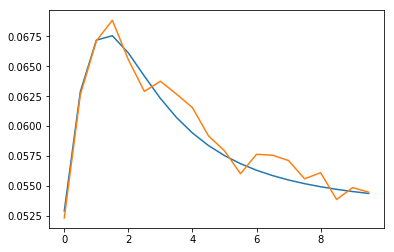

In [336]:
plt.plot(x,yth)
plt.plot(x,yex)

## Power

In [340]:
from scipy import stats

In [26]:
sigma1 = 2
mu1 = 0.2
sigma2 = 1
mu2 = 0
omega1 = 1
omega2 = 2
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
kernel1 = gaussian(omega1**2)
kernel2 = gaussian(omega2**2)
alpha = 0.05
m=1000
n=100
rho1 = 0.2
rho2 = 0.8
beta = np.array([[rho1],[rho2]])

In [25]:
def PowerTh2(Omega, beta, mu1, sigma1, mu2, sigma2, m, n,alpha):
    return stats.norm.sf((np.sqrt(m)*(TresholdTh2(Omega, beta, mu1, sigma1, mu2, sigma2, m, n,alpha)
                           -  MMD_th(np.r_[Omega], mu1, sigma1, mu2, sigma2).dot(beta)))
                          /np.sqrt(beta.T.dot(CovarianceTh(Omega, mu1, sigma1, mu2, sigma2, m, n)).dot(beta)))

In [345]:
x = np.r_[[0.5*i for i in range(20)]]
# Theorie
f = lambda x : PowerTh2([x,omega2], beta, mu1, sigma1, mu2, sigma2, m, n,alpha)
yth = [f(x[i])[0] for i in range(20)]
# Experimental values
yex = [puissance_MC(OMMD, CCK([gaussian(x[i]**2),kernel2],[rho1,rho2]),law_p,law_q,m,n, threshold_MC(CCK([gaussian(x[i]**2),kernel2],[rho1,rho2]),law_p,law_p,m,n, alpha=alpha,verbose=0),repeat=1000) for i in range(20)]

/home/kronert/Documents/Python/Mémoire/Memoire/Anomaly/kernels.py:14: RuntimeWarning: divide by zero encountered in true_divide
  gaussian = lambda sigma: lambda x,y : np.exp(-np.linalg.norm(x-y,axis=1)**2/(2*sigma))


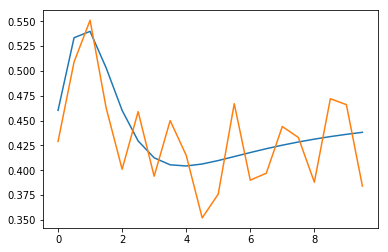

In [346]:
plt.plot(x,yth)
plt.plot(x,yex)

In [29]:
x = np.r_[[0.5*i for i in range(20)]]
# Theorie
f = lambda x : PowerTh2([x,omega2], beta, mu1, sigma1, mu2, sigma2, m, n,alpha)
yth = [f(x[i])[0] for i in range(20)]


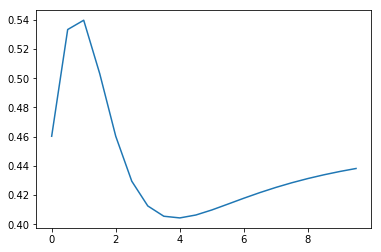

In [30]:
plt.plot(x,yth)


In [86]:
sigma1 = 1.1
mu1 = .2
sigma2 = 1
mu2 = 0
omega = 0.01
omega1 = 0.01
omega2 = 20
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
kernel1 = gaussian(omega1**2)
kernel2 = gaussian(omega2**2)
alpha = 0.05
m=1000
n=100
rho1 = 0.2
rho2 = 0.8
beta = np.array([[rho1],[rho2]])

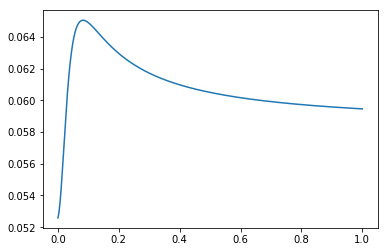

In [87]:
x = np.linspace(0,1,1000)
# Theorie
f = lambda x : PowerTh2([omega1,omega2], np.array([[x],[1-x]]), mu1, sigma1, mu2, sigma2, m, n,alpha)
yth = [f(x[i])[0] for i in range(1000)]
plt.plot(x,yth)

In [88]:
x[np.argmax(yth)]

0.08208208208208208

# polynomial kernels|| Normal Distribution

In [30]:
from scipy.special import binom

In [31]:
from scipy.stats import norm

In [32]:
binom(2,5)

0.0

## Mean Embeding

In [26]:
def meanEmbedingPolTh(x,c,d,mu,sigma):
    somme = 0
    for k in range(d+1):
        somme += binom(k,d)*c**(d-k)*x**k*norm.moment(k, loc=mu,scale=sigma)
    return somme

In [99]:
sigma = 2
mu = -2
d = 4
c = 2
law_p = normal(mu,sigma)
kernel = polynomial(c,d)

In [100]:
x = np.r_[[0.1*i - 10 for i in range(200)]]
# Theorie
f = lambda x : meanEmbedingPolTh(x,c,d,mu,sigma)
yth = [f(x[i]) for i in range(200)]
# Experimental values
yex = [meanEmbeding_MC(kernel, x[i], law_p) for i in range(200)]

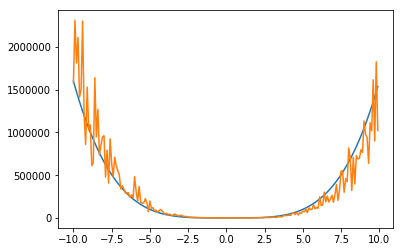

In [101]:
plt.plot(x,yth)
plt.plot(x,yex)

## MMD

In [27]:
def MMDPolTh(c,d,mu1,sigma1,mu2,sigma2):
    somme = 0
    for k in range(d+1):
        somme += binom(d,k)*c**(d-k)*(norm.moment(k, loc=mu1,scale=sigma1)- norm.moment(k, loc=mu2,scale=sigma2))**2
    return somme

In [35]:
sigma1 = 2
mu1 = 1
sigma2 = 2
mu2 = 0
omega = 0.1
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
d = 3
c = 1
kernel = polynomial(c,d)

In [36]:
x = np.r_[[0.1*i - 10 for i in range(200)]]
# Theorie
f = lambda x : MMDPolTh(x,d,mu1,sigma1,mu2,sigma2)
yth =f(x)
# Experimental values
yex = [moyenneMMD_MC(OMMD,polynomial(x[i],d),law_p,law_q,100,100) for i in range(200)]

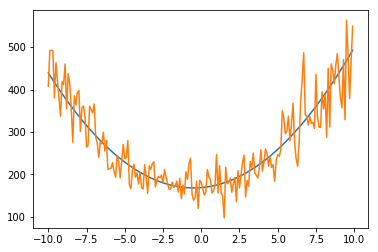

In [37]:
plt.plot(x,yth)
plt.plot(x,yex)

In [96]:
def MomentDordre1(c,d,mu1,sigma1,mu2,sigma2):
    somme = 0
    for k in range(d+1):
        somme += binom(d,k)*c**(d-k)*(norm.moment(k, loc=mu1,scale=sigma1)**2- 2*norm.moment(k, loc=mu1,scale=sigma1)*norm.moment(k, loc=mu2,scale=sigma2))
    return somme

In [97]:
def MomentDordre2(c1,d1,c2, d2, mu1,sigma1,mu2,sigma2):
    somme = 0
    for k in range(d1+1):
        for l in range(d2+1):
            somme += binom(d1,k)*c1**(d1-k)*binom(d2,l)*c2**(d2-l)*(
                                                                    norm.moment(k+l, loc=mu1,scale=sigma1)**2
                                                                     
                                                                    +2*norm.moment(k, loc=mu1,scale=sigma1)*norm.moment(l, loc=mu1,scale=sigma1)*norm.moment(l, loc=mu2,scale=sigma2)*norm.moment(k, loc=mu2,scale=sigma2)
                                                                    +2*norm.moment(k+l, loc=mu1,scale=sigma1)*norm.moment(l, loc=mu2,scale=sigma2)*norm.moment(k, loc=mu2,scale=sigma2)
                                                                    - 2*norm.moment(k+l, loc=mu1,scale=sigma1)*norm.moment(l, loc=mu1,scale=sigma1)*norm.moment(k, loc=mu2,scale=sigma2)
                                                                    - 2*norm.moment(k+l, loc=mu1,scale=sigma1)*norm.moment(k, loc=mu1,scale=sigma1)*norm.moment(l, loc=mu2,scale=sigma2)
                                                                     )
    return somme

In [98]:
def partial_Variance(c,d,mu1,sigma1,mu2,sigma2):
    return MomentDordre2(c,d,c, d, mu1,sigma1,mu2,sigma2) - MomentDordre1(c,d,mu1,sigma1,mu2,sigma2)**2

In [99]:
def Variance(c,d,mu1,sigma1,mu2,sigma2, m,n):
    return partial_Variance(c,d,mu1,sigma1,mu2,sigma2) + m/n*partial_Variance(c,d,mu2,sigma2,mu1,sigma1)

In [100]:
Variance(0.3,3,2,4,3,4, 1000,100)

271311258288.3029

In [101]:
sigma1 = 2
mu1 = 1
sigma2 = 1
mu2 = 0
omega = 0.1
law_p = normal(mu1,sigma1)
law_q = normal(mu2,sigma2)
d = 2
c = 1
kernel = polynomial(c,d)
m=1000
n=100

In [102]:
Variance(c,d,mu1,sigma1,mu2,sigma2, m,n)

5248.0

In [103]:
x = np.r_[[0.05*i for i in range(200)]]
# Theorie
f = lambda x : Variance(x,d,mu1,sigma1,mu2,sigma2, m,n)
yth = f(x)
# Experimental values
yex = [var_OMMD_MC(polynomial(x[i],d),law_p,law_p,Lambda=100/1000,verbose=0) for i in range(200)]

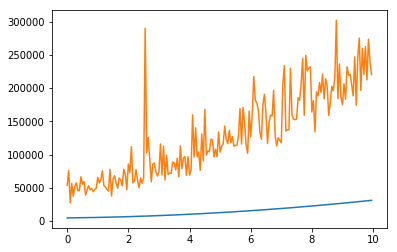

In [104]:
plt.plot(x,yth)
plt.plot(x,yex)

[63242395.36567474,
 132769625.05942816,
 32720329.385812916,
 44944276.91254824,
 59487100.51812995,
 28868020.431244835,
 159623146.4649177,
 120940310.07251775,
 284302892.9093138,
 28831787.38159236,
 42752231.11769958,
 41553893.67763744,
 60203621.11247435,
 46770781.333500534,
 37032746.35494195,
 48973944.651306115,
 48509040.367663115,
 39838795.65325864,
 23360486.46058771,
 28266635.96981727,
 47692251.485529184,
 72671429.79068382,
 298519953.3701213,
 30182534.2144936,
 35375389.93995949,
 64286821.948825486,
 48040900.33998258,
 51668404.916612126,
 75337811.06346075,
 50371328.457732216,
 21671809.233916484,
 125013076.76385044,
 44147771.61005637,
 46345508.94864718,
 37808377.71620085,
 66789766.18283707,
 53371050.774039656,
 23297469.765448056,
 33055992.88751796,
 48031521.38200937,
 26680216.468994737,
 53038335.69992213,
 35462898.42368858,
 102580504.64055465,
 77406157.5141204,
 30322105.74437084,
 50410709.11691817,
 93490593.52479033,
 39947516.2402332,
 63910